In [16]:
#svm
#pc=1
#pf = 0.35
#C=0.01
#kernel = poly

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import os
import pandas as pd

In [18]:
base_dir = '../data/'

In [19]:
files = os.listdir(base_dir)
files = filter(lambda y: map(lambda x: x.split('.'), [y])[0][-1:][0]== 'realrank' , files)

In [20]:
cvs = {}
for f in files:
    with open(base_dir+f) as handle:
        a = handle.readline().split(',')
        cvs[f] = (float(a[0]), float(a[1]))
        
tops_ba = sorted(cvs.items(), key=lambda a: a[1][0], reverse=True)
tops_f1 = sorted(cvs.items(), key=lambda a: a[1][1], reverse=True)

In [75]:
tops_f1

[('steam_1_0.25_model_knn_nneigh_3.realrank',
  (0.7423137254901961, 0.5739358253193603)),
 ('steam_1_0.25_model_knn_nneigh_1.realrank',
  (0.7390280112044818, 0.566200236798063)),
 ('steam_05_0.5_model_knn_nneigh_7.realrank',
  (0.7388683473389357, 0.5656376020134729)),
 ('steam_0_0.5_model_lr_C_1.realrank',
  (0.7357647058823529, 0.5652555593072922)),
 ('steam_0_0.5_model_lr_C_0.1.realrank',
  (0.7336414565826331, 0.5642667299928406)),
 ('steam_1_0.25_model_svm_C_1_kernel_linear.realrank',
  (0.7388823529411765, 0.5642397995024534)),
 ('steam_0_0.25_model_lr_C_0.01.realrank',
  (0.7419607843137255, 0.5638265368251303)),
 ('steam_0_0_model_svm_C_1_kernel_poly.realrank',
  (0.7432549019607844, 0.5627859540240561)),
 ('steam_05_0.75_model_knn_nneigh_7.realrank',
  (0.7360392156862745, 0.5627520021313249)),
 ('steam_1_0.25_model_lr_C_0.1.realrank',
  (0.7282100840336135, 0.5621816218708958)),
 ('steam_1_0.75_model_lr_C_0.01.realrank',
  (0.7378627450980392, 0.5620870301975908)),
 ('steam

In [73]:
map(lambda x: x[0], tops_f1[:10])

['steam_1_0.25_model_knn_nneigh_3.realrank',
 'steam_1_0.25_model_knn_nneigh_1.realrank',
 'steam_05_0.5_model_knn_nneigh_7.realrank',
 'steam_0_0.5_model_lr_C_1.realrank',
 'steam_0_0.5_model_lr_C_0.1.realrank',
 'steam_1_0.25_model_svm_C_1_kernel_linear.realrank',
 'steam_0_0.25_model_lr_C_0.01.realrank',
 'steam_0_0_model_svm_C_1_kernel_poly.realrank',
 'steam_05_0.75_model_knn_nneigh_7.realrank',
 'steam_1_0.25_model_lr_C_0.1.realrank']

In [56]:
#results = [('01', 0.7029411764705882, 0.5108964697304164), ('02', 0.7035294117647058, 0.515951353911875), ('03', 0.6964705882352941, 0.5120848963392557), ('05', 0.7352941176470588, 0.5607289174558332), ('07', 0.7396078431372548, 0.5674619298406618), ('09', 0.743921568627451, 0.5543014280328182)]
results = [('10%', 0.7029411764705882, 0.5108964697304164), ('20%', 0.7035294117647058, 0.515951353911875), ('50%', 0.7352941176470588, 0.5607289174558332), ('70%', 0.7396078431372548, 0.5674619298406618), ('90%', 0.743921568627451, 0.5543014280328182)]
#results =  [('01', 0.7045098039215687, 0.5182040759058543), ('02', 0.7403921568627451, 0.5667138283111678), ('03', 0.718627450980392, 0.5451174801141333), ('05', 0.7152941176470589, 0.5312458482170512), ('07', 0.7096078431372549, 0.5192377142418323), ('09', 0.737450980392157, 0.5591873157769975)]
#results =  [('10', 0.7045098039215687, 0.5182040759058543), ('30', 0.718627450980392, 0.5451174801141333), ('50', 0.7152941176470589, 0.5312458482170512), ('70', 0.7096078431372549, 0.5192377142418323), ('90', 0.737450980392157, 0.5591873157769975)]

In [57]:
results_ba_folds = map(lambda x: (x[0], x[1]), results)
results_f1_folds = map(lambda x: (x[0], x[2]), results)

In [58]:
results_f1_folds

[('10%', 0.5108964697304164),
 ('20%', 0.515951353911875),
 ('50%', 0.5607289174558332),
 ('70%', 0.5674619298406618),
 ('90%', 0.5543014280328182)]

In [59]:
results_ba_folds

[('10%', 0.7029411764705882),
 ('20%', 0.7035294117647058),
 ('50%', 0.7352941176470588),
 ('70%', 0.7396078431372548),
 ('90%', 0.743921568627451)]

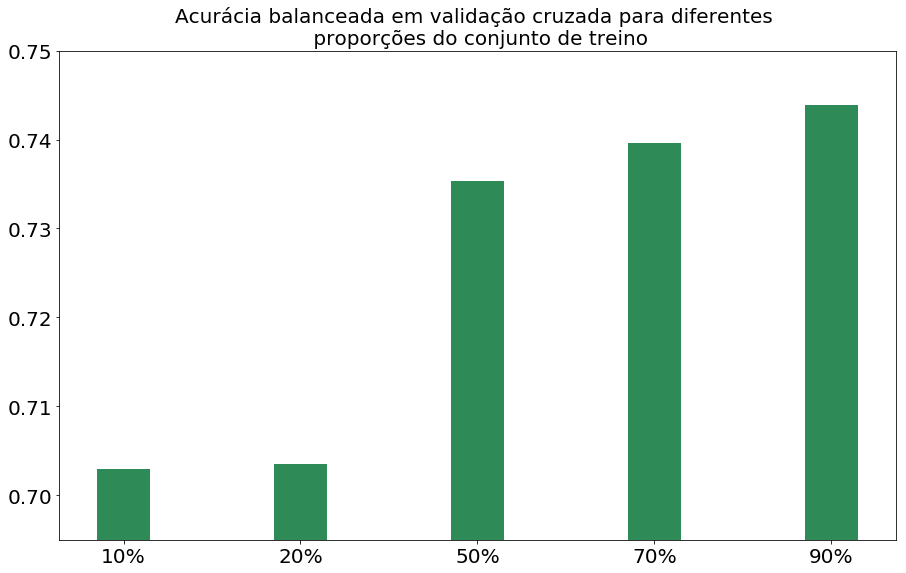

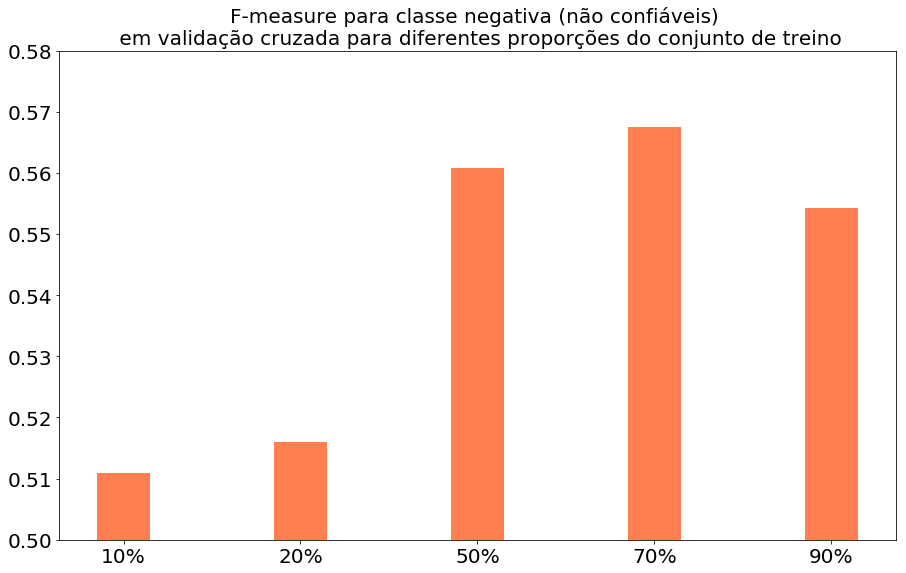

In [122]:
import matplotlib.pyplot as plt

xs=map(lambda x: x[0], results)
y_ba = map(lambda x: x[1], results)
y_f1 = map(lambda x: x[2], results)
plt.figure(figsize=(15,9))
plt.ylim(ymin=0.695, ymax=0.75)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.bar(xs, y_ba, width=0.3, color='seagreen')
plt.title(u'Acurácia balanceada em validação cruzada para diferentes \n proporções do conjunto de treino' , fontsize=20)
plt.show()


plt.figure(figsize=(15,9))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymin=0.5, ymax=0.58)
plt.bar(xs, y_f1, width=0.3, color='coral')
plt.title(u'F-measure para classe negativa (não confiáveis) \n em validação cruzada para diferentes proporções do conjunto de treino', fontsize=20)
plt.show()






<BarContainer object of 4 artists>

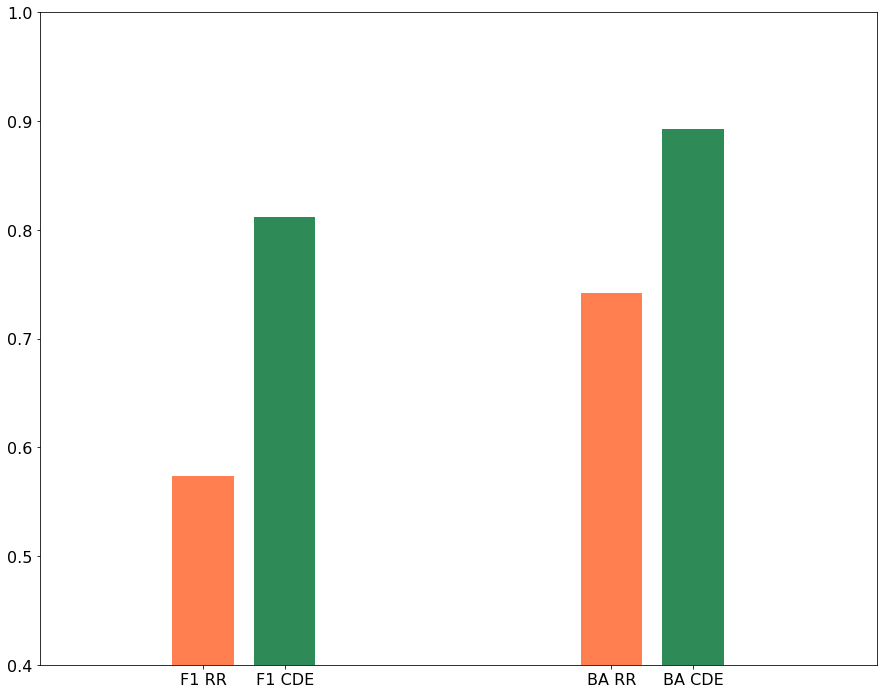

In [113]:
#result ic
# ('accuracy: ', 0.8924705882352942)
# ('f1: ', 0.8119086433344966)
f1_ic = 0.8119086433344966
ba_ic = 0.8924705882352942

f1_rr = 0.5739358253193603
ba_rr = 0.7423137254901961

xs = [u'F1 RR', u'F1 CDE', u'BA RR', u'BA CDE']

plt.figure(figsize=(15,12))
plt.xlim(xmin = 1.2, xmax=5.3)
plt.ylim(ymin = 0.4, ymax=1)
plt.yticks(fontsize=16)
plt.xticks([2,2.4,4,4.4], xs, fontsize=16)
plt.bar([2,2.4,4,4.4], [f1_rr, f1_ic, ba_rr,ba_ic], width=0.3, color=['coral', 'seagreen','coral','seagreen'])